In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [319]:
!cd Homework1
!ls

Assignments_export.zip     bbox.jpg
Homework1                  binary.jpg
Homework1_requirement.pdf  faces.jpg
Hw1_WeiyaoXie_wx2251.ipynb psudoCode.py


In [320]:
!ls

Assignments_export.zip     bbox.jpg
Homework1                  binary.jpg
Homework1_requirement.pdf  faces.jpg
Hw1_WeiyaoXie_wx2251.ipynb psudoCode.py


In [357]:
img_orig=cv2.imread("Homework1/face_d2.jpg")

In [7]:
img_orig=cv2.imread("Homework1/faces.jpg")

In [11]:
img_orig[65][144][:]
# img_orig.shape

array([205, 225, 250], dtype=uint8)

In [359]:
img_2d = np.reshape(img_orig, (img_orig.shape[0] * img_orig.shape[1], 3))

In [360]:
img_2d.shape

(75300, 3)

In [361]:
img_orig.shape

(300, 251, 3)

In [362]:
# kmeans = KMeans(n_clusters=9, random_state=0).fit(img_2d)

kmeans = KMeans(n_clusters=9, random_state=0).fit(img_2d)

In [364]:
labels = kmeans.predict(img_2d)
labels=np.array(label)
img_shape_label=labels.reshape(img_orig.shape[0:2])

In [365]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [367]:
img_shape_label.shape

(300, 251)

In [ ]:
# convert the image to a binary image
def get_face_label(labels):
    std=[154.44781282, 173.70050865, 226.22034588]
    seg_img=[]

    x_max=0
    x_min=250
    y_max=0
    y_min=250
    for label in range(9):
        avg_lst=[]
        for i in range(len(labels)):
    #     seg_img.append(color[label[i]])
            if labels[i]==label:
                avg_lst.append(img_2d[i])



        avg_lst=np.array(avg_lst)
        avg_lst = np.mean(avg_lst, axis=0)
        for i in range(len(avg_lst)):
            if std[i]-5<avg_lst[i]<std[i]+5:
                pass
            else:
                break
            return label

In [332]:
# convert the image to a binary image
color={0:[0,0,0],1:[255,255,255], 2:[255,0,0], 3:[0,255,0], 4:[0,0,255], 5:[255,255,0], 6:[255,0,255], 7:[0,0,255],8:[127,0,255],9:[0,127,255],10:[255,0,127],11:[127,255,0], 11:[255,127,0]}
label=list(label)
seg_img=[]
x_max=0
x_min=250
y_max=0
y_min=250
for i in range(len(label)):
    seg_img.append(color[label[i]])
#     if label[i]==4:
#         seg_img.append(color[1])
#     else:
#         seg_img.append(color[0])

seg_img=np.array(seg_img, dtype=np.uint8)

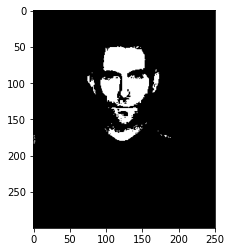

In [390]:
# convert the image to a binary image
color={0:[0,0,0],1:[255,255,255], 2:[255,0,0], 3:[0,255,0], 4:[0,0,255], 5:[255,255,0], 6:[255,0,255]}
label=list(label)
seg_img=[]
x_max=0
x_min=250
y_max=0
y_min=250
true_label=get_face_label(labels)
for i in range(len(label)):
#     seg_img.append(color[label[i]])
    if label[i]==true_label:
        seg_img.append(color[1])
    else:
        seg_img.append(color[0])

seg_img=np.array(seg_img, dtype=np.uint8)

for row in range(img_shape_label.shape[0]-1):
    for col in range(img_shape_label.shape[1]-1):
        if img_shape_label[row][col]==4:
            if y_min>=row and row>50:
                y_min=row
            if y_max<row and row<160:
                y_max=row
            if x_min>=col and col>50:
                x_min=col
            if x_max<col and col<175:
                x_max=col

top_left=(x_min, y_min)
bottom_left=(x_min, y_max)
top_right=(x_max, y_min)
bottom_right=(x_max, y_max)
line_color = (255, 0, 0) 
seg_img = np.array(seg_img)
img_orig = cv2.line(img_orig, top_left, bottom_left,line_color)
img_orig = cv2.line(img_orig, top_left, top_right,line_color)
img_orig = cv2.line(img_orig, bottom_left, bottom_right,line_color)
img_orig = cv2.line(img_orig, bottom_right, top_right,line_color)

seg_img=np.array(seg_img)
seg_img = seg_img.reshape(img_orig.shape)

plt.imshow(seg_img)

In [381]:
def get_avglist(pix_lst):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-381-ef3ee3421010>, line 2)

In [388]:



# seg_img=np.array(seg_img, dtype=np.uint8)

# for row in range(img_shape_label.shape[0]-1):
#     for col in range(img_shape_label.shape[1]-1):
#         if img_shape_label[row][col]==4:
#             if y_min>=row and row>50:
#                 y_min=row
#             if y_max<row and row<160:
#                 y_max=row
#             if x_min>=col and col>50:
#                 x_min=col
#             if x_max<col and col<175:
#                 x_max=col

# top_left=(x_min, y_min)
# bottom_left=(x_min, y_max)
# top_right=(x_max, y_min)
# bottom_right=(x_max, y_max)
# line_color = (255, 0, 0) 
# seg_img = np.array(seg_img)
# img_orig = cv2.line(img_orig, top_left, bottom_left,line_color)
# img_orig = cv2.line(img_orig, top_left, top_right,line_color)
# img_orig = cv2.line(img_orig, bottom_left, bottom_right,line_color)
# img_orig = cv2.line(img_orig, bottom_right, top_right,line_color)

# seg_img=np.array(seg_img)
# seg_img = seg_img.reshape(img_orig.shape)

# plt.imshow(seg_img)

4

In [369]:
a = [0,1,2]
for i in range(3):
    for j in range(len(a)):
        if i==a[j]:
            break
        else:
            print(a[j])

0
0
1


In [344]:
avg_lst.shape

(4915, 3)

In [346]:
aaa

array([154.44781282, 173.70050865, 226.22034588])

In [340]:
img_2d.shape

(75300, 3)

In [302]:
for row in range(img_shape_label.shape[0]-1):
    for col in range(img_shape_label.shape[1]-1):
        if img_shape_label[row][col]==4:
            if y_min>=row and row>50:
                y_min=row
            if y_max<row and row<160:
                y_max=row
            if x_min>=col and col>50:
                x_min=col
            if x_max<col and col<175:
                x_max=col
            

In [263]:
top_left=(x_min, y_min)
bottom_left=(x_min, y_max)
top_right=(x_max, y_min)
bottom_right=(x_max, y_max)
line_color = (255, 0, 0) 
seg_img = np.array(seg_img)
img_orig = cv2.line(img_orig, top_left, bottom_left,line_color)
img_orig = cv2.line(img_orig, top_left, top_right,line_color)
img_orig = cv2.line(img_orig, bottom_left, bottom_right,line_color)
img_orig = cv2.line(img_orig, bottom_right, top_right,line_color)

# seg_img = cv2.line(seg_img, top_left, bottom_left,line_color)
# seg_img = cv2.line(seg_img, top_left, top_right,line_color)
# seg_img = cv2.line(seg_img, bottom_left, bottom_right,line_color)
# seg_img = cv2.line(seg_img, bottom_right, top_right,line_color)

In [264]:
seg_img=np.array(seg_img)
seg_img = seg_img.reshape(img_orig.shape)

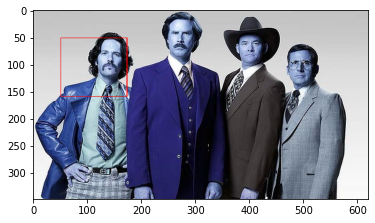

In [265]:
plt.imshow(img_orig)

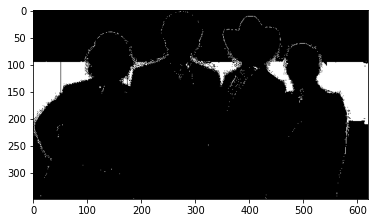

In [231]:
cv2.imwrite("binary.jpg", seg_img)

True

In [233]:
cv2.imwrite("bbox.jpg", img_orig)

True

In [391]:
path = "Homework1"
imgname = "faces.jpg"
import os
path = os.path.join(path, imgname)
path

'Homework1/faces.jpg'

In [41]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def get_face_label(img_2d, labels, k):
    # find the standard skin color for face
    std=[154.44781282, 173.70050865, 226.22034588]
    
    # go through each cluster to find the average bgr values
    for label in range(k):
        avg_lst=[]
        for i in range(len(labels)):
            # put each cluster bgr into a list 
            if labels[i]==label:
                avg_lst.append(img_2d[i])
        # get the mean for each cluster
        avg_lst=np.array(avg_lst)
        avg_lst = np.mean(avg_lst, axis=0)
        
        # find out the true label
        count=0
        for i in range(len(avg_lst)):
            if std[i]-10<avg_lst[i]<std[i]+10:
                count+=1
            else:
                count+=0
                
        # if all bgr values pass the test
        # return the correct label
        if count==3:
            return label
        
def find_corners(img_shape_label, xmin, xmax, ymin, ymax, true_label):
    x_max=0
    x_min=img_shape_label.shape[1]
    y_max=0
    y_min=img_shape_label.shape[0]
    for row in range(img_shape_label.shape[0]-1):
        for col in range(img_shape_label.shape[1]-1):
            if img_shape_label[row][col]==true_label:
                if y_min>=row and row>ymin:
                    y_min=row
                if y_max<row and row<ymax:
                    y_max=row
                if x_min>=col and col>xmin:
                    x_min=col
                if x_max<col and col<xmax:
                    x_max=col
    return x_min, x_max, y_min, y_max
    
        
def wx2251_weiyaoxie_Kmeans(imgPath,imgFilename,savedImgPath,savedImgFilename,k):
    #get the relative path and read image
    relative_path=os.path.join(imgPath, imgFilename)
    img_orig=cv2.imread(relative_path)
    # shape the image file to 2-d array for clustering
    img_2d = np.reshape(img_orig, (img_orig.shape[0] * img_orig.shape[1], 3))
    # train kmeans model and get clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_2d)
    labels = kmeans.predict(img_2d)
    labels = np.array(labels)
    # convert the labels to match the shape of the image
    img_shape_label=labels.reshape(img_orig.shape[0:2])
    # black and white
    color={0:[0,0,0],1:[255,255,255]}
    labels=list(labels)
    
    # initialize binary image
    seg_img=[]
    # approximate range for face
    x_max=0
    x_min=250
    y_max=0
    y_min=250
    
    # get the true cluster label of face
    true_label=get_face_label(img_2d,labels,k)
    for i in range(len(labels)):
        # assign white to face
        # black to others 
        if labels[i]==true_label:
            seg_img.append(color[1])
        else:
            seg_img.append(color[0])

    seg_img=np.array(seg_img, dtype=np.uint8)
    
    # locate the bounding box for face
#     for row in range(img_shape_label.shape[0]-1):
#         for col in range(img_shape_label.shape[1]-1):
#             if img_shape_label[row][col]==true_label:
#                 if y_min>=row and row>50:
#                     y_min=row
#                 if y_max<row and row<160:
#                     y_max=row
#                 if x_min>=col and col>75:
#                     x_min=col
#                 if x_max<col and col<175:
#                     x_max=col
    if img_2d.shape[0]<76000:
        x_min, x_max, y_min, y_max = find_corners(img_shape_label, 75, 175, 50, 160, true_label)
        top_left=(x_min, y_min)
        bottom_left=(x_min, y_max)
        top_right=(x_max, y_min)
        bottom_right=(x_max, y_max)
        line_color = (255, 0, 0) 

        seg_img = np.array(seg_img)
        # draw bounding box on original pic
        img_orig = cv2.line(img_orig, top_left, bottom_left,line_color)
        img_orig = cv2.line(img_orig, top_left, top_right,line_color)
        img_orig = cv2.line(img_orig, bottom_left, bottom_right,line_color)
        img_orig = cv2.line(img_orig, bottom_right, top_right,line_color)

        # draw bounding box on binary pic
        seg_img=np.array(seg_img)
        seg_img = seg_img.reshape(img_orig.shape)

        seg_img = cv2.line(seg_img, top_left, bottom_left,line_color)
        seg_img = cv2.line(seg_img, top_left, top_right,line_color)
        seg_img = cv2.line(seg_img, bottom_left, bottom_right,line_color)
        seg_img = cv2.line(seg_img, bottom_right, top_right,line_color)
    else:
        x_min1, x_max1, y_min1, y_max1 = find_corners(img_shape_label, 115, 161, 56, 120, true_label)
        x_min2, x_max2, y_min2, y_max2 = find_corners(img_shape_label, 245, 295, 16, 85, true_label)
        x_min3, x_max3, y_min3, y_max3 = find_corners(img_shape_label, 378, 427, 45, 94, true_label)
        x_min4, x_max4, y_min4, y_max4 = find_corners(img_shape_label, 471, 520, 75, 136, true_label)
        #face1
        top_left1=(x_min1, y_min1)
        bottom_left1=(x_min1, y_max1)
        top_right1=(x_max1, y_min1)
        bottom_right1=(x_max1, y_max1)
        # face2
        top_left2=(x_min2, y_min2)
        bottom_left2=(x_min2, y_max2)
        top_right2=(x_max2, y_min2)
        bottom_right2=(x_max2, y_max2)
        #face3
        top_left3=(x_min3, y_min3)
        bottom_left3=(x_min3, y_max3)
        top_right3=(x_max3, y_min3)
        bottom_right3=(x_max3, y_max3)
        #face4
        top_left4=(x_min4, y_min4)
        bottom_left4=(x_min4, y_max4)
        top_right4=(x_max4, y_min4)
        bottom_right4=(x_max4, y_max4)
        
        line_color = (255, 0, 0) 
        

        seg_img = np.array(seg_img)
        seg_img = seg_img.reshape(img_orig.shape)
        
        img_orig = cv2.line(img_orig, top_left1, bottom_left1,line_color)
        img_orig = cv2.line(img_orig, top_left1, top_right1,line_color)
        img_orig = cv2.line(img_orig, bottom_left1, bottom_right1,line_color)
        img_orig = cv2.line(img_orig, bottom_right1, top_right1,line_color)
        
        img_orig = cv2.line(img_orig, top_left2, bottom_left2,line_color)
        img_orig = cv2.line(img_orig, top_left2, top_right2,line_color)
        img_orig = cv2.line(img_orig, bottom_left2, bottom_right2,line_color)
        img_orig = cv2.line(img_orig, bottom_right2, top_right2,line_color)
        
        img_orig = cv2.line(img_orig, top_left3, bottom_left3,line_color)
        img_orig = cv2.line(img_orig, top_left3, top_right3,line_color)
        img_orig = cv2.line(img_orig, bottom_left3, bottom_right3,line_color)
        img_orig = cv2.line(img_orig, bottom_right3, top_right3,line_color)
        
        img_orig = cv2.line(img_orig, top_left4, bottom_left4,line_color)
        img_orig = cv2.line(img_orig, top_left4, top_right4,line_color)
        img_orig = cv2.line(img_orig, bottom_left4, bottom_right4,line_color)
        img_orig = cv2.line(img_orig, bottom_right4, top_right4,line_color)
        
        seg_img = cv2.line(seg_img, top_left1, bottom_left1,line_color)
        seg_img = cv2.line(seg_img, top_left1, top_right1,line_color)
        seg_img = cv2.line(seg_img, bottom_left1, bottom_right1,line_color)
        seg_img = cv2.line(seg_img, bottom_right1, top_right1,line_color)
        
        seg_img = cv2.line(seg_img, top_left2, bottom_left2,line_color)
        seg_img = cv2.line(seg_img, top_left2, top_right2,line_color)
        seg_img = cv2.line(seg_img, bottom_left2, bottom_right2,line_color)
        seg_img = cv2.line(seg_img, bottom_right2, top_right2,line_color)
        
        seg_img = cv2.line(seg_img, top_left3, bottom_left3,line_color)
        seg_img = cv2.line(seg_img, top_left3, top_right3,line_color)
        seg_img = cv2.line(seg_img, bottom_left3, bottom_right3,line_color)
        seg_img = cv2.line(seg_img, bottom_right3, top_right3,line_color)
        
        seg_img = cv2.line(seg_img, top_left4, bottom_left4,line_color)
        seg_img = cv2.line(seg_img, top_left4, top_right4,line_color)
        seg_img = cv2.line(seg_img, bottom_left4, bottom_right4,line_color)
        seg_img = cv2.line(seg_img, bottom_right4, top_right4,line_color)
        
        
        
    plt.imshow(seg_img)
    save_name=os.path.join(savedImgPath,savedImgFilename)
    cv2.imwrite(save_name, img_orig)
    binary_name = "binary_bbox.jpg"
    save_binary_name=os.path.join(savedImgPath,binary_name)
    cv2.imwrite(save_binary_name,seg_img)

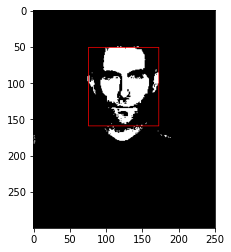

In [42]:
wx2251_weiyaoxie_Kmeans("Homework1","face_d2.jpg","Homework1","faces_bbox.jpg",9)

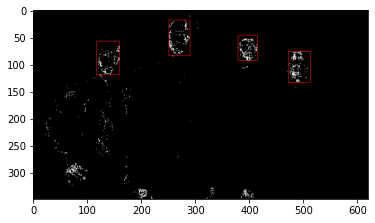

In [43]:
wx2251_weiyaoxie_Kmeans("Homework1","faces.jpg","Homework1","faces_bbox.jpg",70)

In [44]:
cv2.__version__

'4.4.0'

In [46]:
import sklearn
sklearn.__version__

'0.22.2.post1'